# Analysis of Credit card fault detection
    - by MITHU EMILINE JAMES

#### Answers to the task for non-opportunistic fraud:     
    1) Compromised merchant - M18     
    2) Harvest dates - 15,16     
    3) Exploitation dates - 21,22,23

### PROBLEM STATEMENT
    Identification of virtual exploitation of credit cards from exploitation pattern

### ASSUMPTION
    1) Harvest days are adjacent to one another (from pictorial plot in question)
    2) Exploitation days are also adjacent to one another (from pictorial plot in question)
    3) Potential opportunistic fraud on exploitation dates can be eliminated by avoiding accounts with fewer transactions

### APPROACH TO THE PROBLEM
    1) Identify potential exploitation dates from exploitation frequency
    2) Subset the data using a cut-off date for latest harvest period
    3) Extract the set of transactions for the exploited accounts
    4) Choose a harvest-suspicious subset, based on high frequency for [Merchant-Date] combination of transactions
    5) Sort in decreasing order of [Merchant - Date] frequencies and choose the [Merchant-Date] combination with highest frequency as the 'Compromised Merchant' and 'Harvest Dates'
    6) Validate that all the transacted accounts in the harvest dates are exploited on the above identified exploitation dates

##### Techniques used:
    a) Data encoding with lambda expression
    b) Data distribution with histograms
    c) Normality assumption and use of standard deviation to decide on various threshold values
    d) Dataframe subsetting with conditions and look up values from list
    e) Tuple manipulations by 
        (i) combining column values and 
        (ii) splitting columns with tuples into different columns
    f) Identification of unique values in list with set function
    g) Typecasting of dataframe column values to int with map function
    h) Hashing of keys and dictionary look up for quicker execution
    i) Creation and extension of lists
    j) Frequency count of column values using value_counts function
    k) Deletion, ordering and renaming of dataframe columns
    l) Comparison of list values for match

###### Environment set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import csv
from numpy import ndarray
import itertools
from datetime import datetime
from itertools import groupby
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)

###### Data set up
    1) Load data
    2) Encode data with mutually exclusive numerical code

In [2]:
startTime = datetime.now()
filepath = 'C:/Users/homeuser/Documents/MEJ/transactions.csv'
txns = pd.read_csv(filepath)
highFreqTxn_Threshold = 7 #Refer 'Notes' section
MismatchBtwHarvestExploitationAccts_Threshold = 5 #Refer 'Testing' section
#Formatting 'txns' for convinience
txns['date'] = txns['date'] .apply(lambda x: int(str.split(str(x),'-')[2]))
txns['merchant'] = txns['merchant'].apply(lambda x: int(x.replace('M','')))
txns['account'] = txns['account'].apply(lambda x: int(x.replace('A','')))
txns['fraud'] = txns['fraud'].apply(lambda x:1 if str(x) == 'True' else 0)

###### Initial exploration of data
    1) Explore the distribution of credit card account usage at account and day levels
    2) Explore the distribution of fraudulent account usage


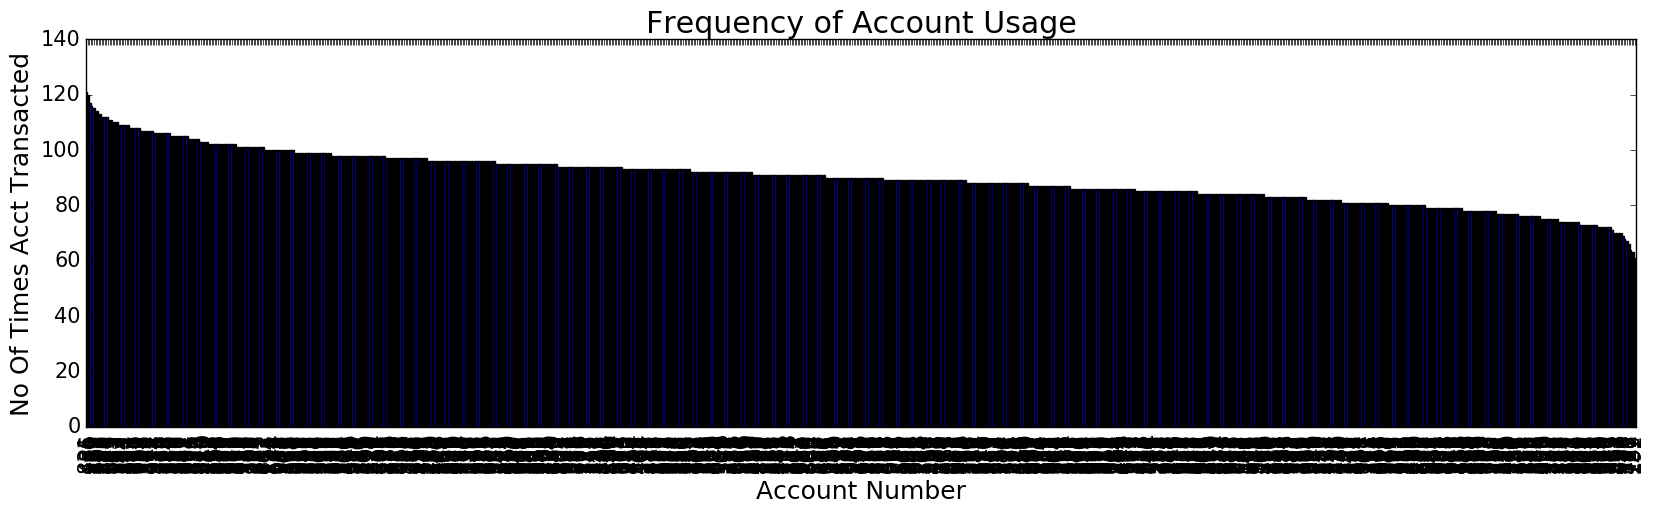

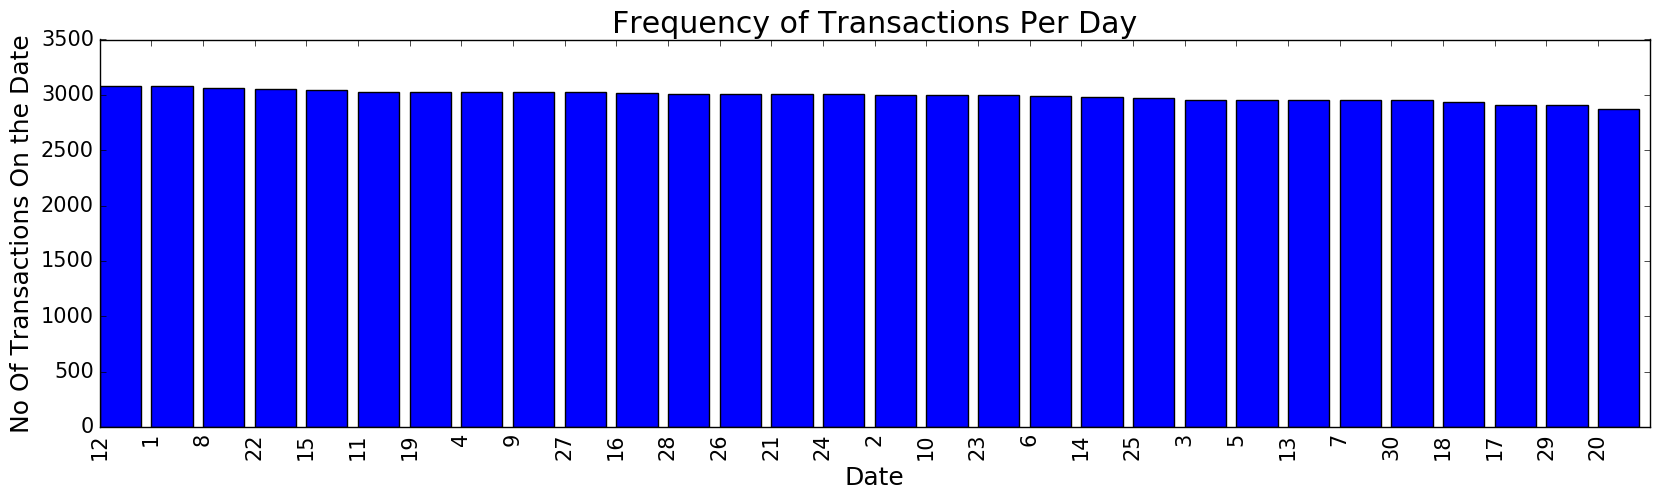

In [3]:
#Plotting of ALL transactions per account
hist = pd.DataFrame(txns['account'].value_counts())
hist['All_Accts'] = list(hist.index.values)
hist.rename(columns={'account':'NoOfTxnsInAcct'},inplace=True)
y_pos = np.arange(len(hist))
plot1_start = datetime.now()
plt.figure(figsize=(20,5))
plt.bar(y_pos,hist['NoOfTxnsInAcct'])
plt.xticks(y_pos,hist['All_Accts'],rotation=90)
plt.ylabel('No Of Times Acct Transacted')
plt.xlabel('Account Number')
plt.title('Frequency of Account Usage')
plot1 = datetime.now() - plot1_start
#Plotting of ALL transactions per day
hist = pd.DataFrame(txns['date'].value_counts())
hist['TxnDate'] = list(hist.index.values)
hist.rename(columns={'date':'NoOfTxnsOnDate'},inplace=True)
y_pos = np.arange(len(hist))
plot2_start = datetime.now()
plt.figure(figsize=(20,5))
plt.bar(y_pos,hist['NoOfTxnsOnDate'])
plt.xticks(y_pos,hist['TxnDate'],rotation=90)
plt.ylabel('No Of Transactions On the Date')
plt.xlabel('Date')
plt.title('Frequency of Transactions Per Day')
plot2 = datetime.now() - plot2_start

##### Extraction of ALL fraudulent transactions for ALL accounts on ALL dates
    1) Identify potential exploitation dates by frequency of transactions per account (2SD and 1SD were considered)
    2) Extract fraudulent transactions for all exploited accounts on the specific exploitation dates (i.e. 21 to 23 Jan)

In [4]:
fraudTxns = txns.loc[txns['fraud'] == 1].filter(['date', 'merchant', 'account'], axis=1)
fraudTxns['MA'] = [tuple(x) for x in fraudTxns.filter(['merchant', 'account'], axis=1).values]
allExploitedAcctsTxnsByDate = fraudTxns.filter(['date','MA'], axis=1)#All fraudulent transactions by date
fraudCountByDate = allExploitedAcctsTxnsByDate['date'].value_counts()
fraudGT2SD = int(fraudCountByDate.mean() + 2*fraudCountByDate.std())#Threshold transaction count for exploitation
print('Dates with transactions more than 2 StdDev - ' + str(fraudGT2SD) + ' - are chosen as exploitation dates')

Dates with transactions more than 2 StdDev - 140 - are chosen as exploitation dates


###### Further data exploration

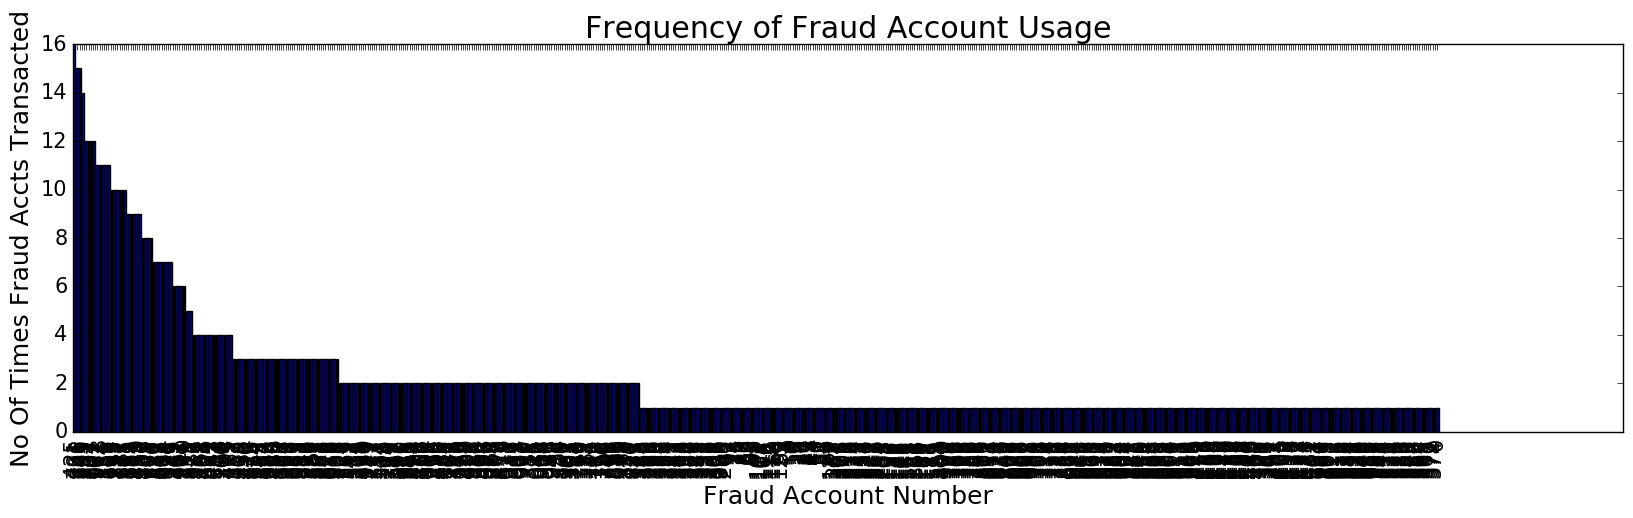

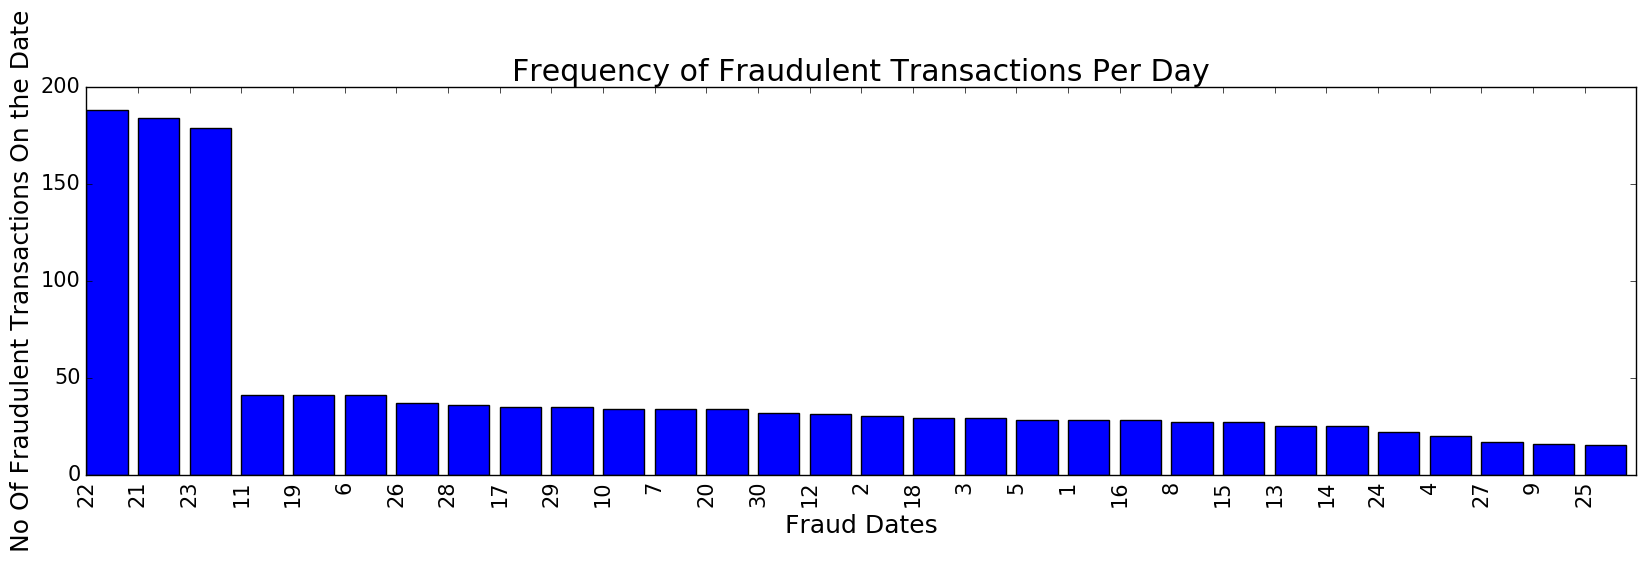

In [5]:
#Plotting of FRAUD transactions per account
hist = pd.DataFrame(fraudTxns['account'].value_counts())
hist['Fraud_Accts'] = list(hist.index.values)
hist.rename(columns={'account':'NoOf_Fraud_TxnsInAcct'},inplace=True)
y_pos = np.arange(len(hist))
plot3_start = datetime.now()
plt.figure(figsize=(20,5))
plt.bar(y_pos,hist['NoOf_Fraud_TxnsInAcct'])
plt.xticks(y_pos,hist['Fraud_Accts'],rotation=90)
plt.ylabel('No Of Times Fraud Accts Transacted')
plt.xlabel('Fraud Account Number')
plt.title('Frequency of Fraud Account Usage')
plot3 = datetime.now() - plot3_start
#Plotting of FRAUD transactions per day
hist = pd.DataFrame(fraudTxns['date'].value_counts())
hist['Fraud_TxnDate'] = list(hist.index.values)
hist.rename(columns={'date':'NoOf_Fraud_TxnsOnDate'},inplace=True)
y_pos = np.arange(len(hist))
plot4_start = datetime.now()
plt.figure(figsize=(20,5))
plt.bar(y_pos,hist['NoOf_Fraud_TxnsOnDate'])
plt.xticks(y_pos,hist['Fraud_TxnDate'],rotation=90)
plt.ylabel('No Of Fraudulent Transactions On the Date')
plt.xlabel('Fraud Dates')
plt.title('Frequency of Fraudulent Transactions Per Day')
plot4 = datetime.now() - plot4_start

##### Analysis of data begins...
    1) Prepare a fraud summary table for Exploitation with ALL and UNIQUE accounts, merchants and dates
    2) Choose a cut-off date for potential latest harvest date from above data to define a date range for potential harvesting (i.e. 01 to 20 Jan)

In [6]:
#Creating a summary table for exploitation - includes merchant, date and account summaries
fraudSummary = pd.DataFrame(columns=['Date','NoOfTimesAcctsExploited','AcctsExploited','UniqueAcctsExploited',
                                     'NoOfUniqueAcctsExploited','UniqueMerchantsTransacted','NoOfUniqueMerchant'])
fraudSummary['Date'] = fraudCountByDate[(fraudCountByDate > fraudGT2SD)].index
harvestDateCutOff = int(min(fraudSummary['Date']))

###### Extraction of FRAUD transactions FOR exploited accounts ON Exploitation dates


In [7]:
exploitedAcctsByExploitationDate = allExploitedAcctsTxnsByDate.loc[allExploitedAcctsTxnsByDate['date'].isin(fraudSummary['Date'])]
exploitedAcctsByExploitationDate['Merchant'],exploitedAcctsByExploitationDate['Account'] = zip(*exploitedAcctsByExploitationDate['MA'])
exploitedAcctsByExploitationDate['AD'] = list(zip(exploitedAcctsByExploitationDate['date'],exploitedAcctsByExploitationDate['Account']))

###### Fraud Summary table for ONLY exploitation dates

In [8]:
for i,each in enumerate(fraudSummary['Date']):    
    fraudSummary['NoOfTimesAcctsExploited'][i] = exploitedAcctsByExploitationDate[exploitedAcctsByExploitationDate['date']==int(each)].count()[0]
    fraudSummary['AcctsExploited'][i] = list(map(int,(exploitedAcctsByExploitationDate[exploitedAcctsByExploitationDate['date']==int(each)]['Account'])))
    fraudSummary['UniqueAcctsExploited'][i] = np.unique(fraudSummary['AcctsExploited'][i])
    fraudSummary['NoOfUniqueAcctsExploited'][i] = len(fraudSummary['UniqueAcctsExploited'][i])
    fraudSummary['UniqueMerchantsTransacted'][i] = exploitedAcctsByExploitationDate[exploitedAcctsByExploitationDate['date']==int(each)]['Merchant'].unique().tolist()
    fraudSummary['NoOfUniqueMerchant'][i] = len(fraudSummary['UniqueMerchantsTransacted'][i])
del i,each

In [9]:
exploitedAccts = list(set(list(itertools.chain.from_iterable(fraudSummary['UniqueAcctsExploited']))))
rangeForHarvestDates = allExploitedAcctsTxnsByDate[allExploitedAcctsTxnsByDate['date']<harvestDateCutOff]
comboMerchantAcct_ByPotentialHarvestDates = {key: value['date'].tolist() for key,value in rangeForHarvestDates.groupby('MA')}
del rangeForHarvestDates

##### Exraction of FRAUD transactions BEFORE exploitation cut-off date (i.e. harvest date range)
    - This defines the harvest range

In [10]:
#nonFraudTxns = txns[(txns['date'] < harvestDateCutOff)].filter(['date', 'merchant', 'account'], axis=1)
nonFraudTxns = txns[(txns['date'] < harvestDateCutOff) & (txns['fraud'] == 0 )].filter(['date', 'merchant', 'account'], axis=1)
nonFraudTxns['A_D'] = [tuple(x) for x in nonFraudTxns.filter(['account','date']).values]
nonFraudTxns['M_A_D'] = [tuple(x) for x in nonFraudTxns.filter(['merchant','account','date']).values]
nonFraudTxns['M_D'] = [tuple(x) for x in nonFraudTxns.filter(['merchant','date']).values]
nonFraudTxns['A_D_hash'] = nonFraudTxns['A_D'].apply(hash)#Hashed account-date
nonFraudTxns['M_A_D_hash'] = nonFraudTxns['M_A_D'].apply(hash)#Hashed merchant-account-date
nonFraudTxns['M_D_hash'] = nonFraudTxns['M_D'].apply(hash)#Hashed merchant-date
nonFraudTxns_MDbyAccts = {key: value['M_D'].tolist() for key,value in nonFraudTxns.groupby('account')}

###### Extraction of transactions for exploited accounts from the harvest date range

In [11]:
harvestedTxns_AMD = pd.DataFrame(columns=['Account','Merchant','Date'])
notpreviouslyTransactedExploitedAcct = []
for i,each in enumerate(exploitedAccts):
    hashValue = hash(each)
    if(hashValue in nonFraudTxns_MDbyAccts):
        value = nonFraudTxns_MDbyAccts.get(hashValue)
        value = [(hashValue,x,y) for x,y in value]
        tempDup = pd.DataFrame(list(value),columns=list(['Account','Merchant','Date']))
        harvestedTxns_AMD = harvestedTxns_AMD.append(tempDup)
    else:
        notpreviouslyTransactedExploitedAcct.append(each)
harvestedTxns_AMD['MD'] = [(int(x[0]),int(x[1])) for x in harvestedTxns_AMD.filter(['Merchant','Date']).values]
del i,each,tempDup,hashValue,value

###### Generation of ALL [Merchant-Date] combinations from above transactions for exploited accounts

In [12]:
MerchantDateCombo = pd.DataFrame(harvestedTxns_AMD['Account'].groupby([harvestedTxns_AMD['MD']]).count())
MerchantDateCombo_Dict = {key: value['Account'].tolist() for key,value in harvestedTxns_AMD.groupby('MD')}
MerchantDateCombo.loc[:, 'ListOfAccounts'] = ''
MerchantDateCombo['MD'] = list(MerchantDateCombo.index.values)
temp = []
for i,each in enumerate(MerchantDateCombo['MD']):
    temp.append(list(map(int,MerchantDateCombo_Dict.get(each))))
MerchantDateCombo['ListOfAccounts'] = temp
MerchantDateCombo.rename(columns={'Account': 'NoOfAccountsTransacted'}, inplace=True)
del i,each,temp

##### Selection of SUSPICIOUS [Merchant-Date] combinations for harvesting 
    - Filter condition is selection of transactions based on a high no. of accounts which were exploited
    - Helps in removal of opportunistic fraud (which is low in exploitation per merchant per day)

In [13]:
suspiciousMerchants = MerchantDateCombo[MerchantDateCombo['NoOfAccountsTransacted']>highFreqTxn_Threshold]
suspiciousMerchants['Merchant'],suspiciousMerchants['Date'] = zip(*list(suspiciousMerchants.index.values))
suspMerchants = list(suspiciousMerchants['Merchant'].unique())
suspMerchants_TxnDatesForExploitedAccts = {int(key): value['Date'].tolist() for key,value in suspiciousMerchants.groupby('Merchant')}

##### Identification of COMPROMISED Merchant based on high frequency transactions with many accounts on various days
    1) Select the merchant of compromise and harvest dates as the merchant-date combination with highest frequency of transactions for various accounts
    2) Compare the chosen frequency to the next highest value to gain sufficient confidence on the discovery

In [14]:
final_MerchantAcct_Combo = pd.DataFrame(columns = ['Merchants','UniqueAcctList','UniqueNoOfAccts'])
final_MerchantAcct_Combo['Merchants'] = suspMerchants
for i,each in enumerate(suspMerchants):
    temp = suspiciousMerchants[suspiciousMerchants['Merchant']==each]
    result = list(set(x for l in temp['ListOfAccounts'] for x in l))
    final_MerchantAcct_Combo['UniqueAcctList'][i] = result
del temp,result,i,each
final_MerchantAcct_Combo['UniqueNoOfAccts'] = [len(x) for x in final_MerchantAcct_Combo['UniqueAcctList']]
finalCulprit = final_MerchantAcct_Combo[final_MerchantAcct_Combo['UniqueNoOfAccts']==final_MerchantAcct_Combo['UniqueNoOfAccts'].max()]
finalMerchant = int(finalCulprit['Merchants'].values[0])
finalAccts = finalCulprit['UniqueAcctList'].values[0]
finalNoOfAcctsHarvested = len(finalAccts)
finalHarvestDate = suspMerchants_TxnDatesForExploitedAccts.get(finalMerchant)
finalExploitedDate = list(fraudSummary['Date'])
print('Merchant compromised: ' + str(finalMerchant))
print('Harvest days: ' + str(finalHarvestDate))
print('Exploitation days: ' + str(finalExploitedDate))
print('No. of accounts harvested: ' + str(finalNoOfAcctsHarvested))
print('Accounts harvested: ' + str(finalAccts))

Merchant compromised: 18
Harvest days: [15, 16]
Exploitation days: [22, 21, 23]
No. of accounts harvested: 52
Accounts harvested: [896, 645, 8, 648, 395, 907, 403, 787, 665, 154, 793, 921, 541, 802, 420, 37, 551, 40, 809, 425, 299, 556, 167, 430, 943, 817, 434, 951, 952, 825, 699, 701, 704, 581, 837, 841, 203, 461, 334, 336, 728, 603, 731, 349, 991, 355, 743, 746, 111, 882, 116, 119]


###### Bar plot for No. of times Exploited accounts were fraudulently transacted

In [15]:
temp = exploitedAcctsByExploitationDate[exploitedAcctsByExploitationDate['Account'].isin(finalAccts)]
plotTemp = pd.DataFrame(columns = ['Group','date_Acct_mCount'])
plotTemp['Group'] = temp.groupby(['date', 'Account','Merchant']).size()
plotTemp['date_Acct_mCount'] = list(plotTemp.index.values)
del temp,plotTemp['Group']
plotTemp['date_Acct_mCount'] = plotTemp['date_Acct_mCount'].apply(lambda x: str.split(str(x),'(')[1])
plotTemp['date_Acct_mCount'] = plotTemp['date_Acct_mCount'].apply(lambda x: str.split(str(x),')')[0])
barPlot = plotTemp['date_Acct_mCount'].apply(lambda x: pd.Series(str(x).split(',')))
barPlot.columns = ['Date','Account', 'NoOfMerchants']
del plotTemp
hist = pd.DataFrame(barPlot['Account'].value_counts())
hist['Exploited_Acct'] = list(hist.index.values)
hist.rename(columns={'Account':'NoOfTimes_AcctTransacted',1:'author'},inplace=True)
del barPlot


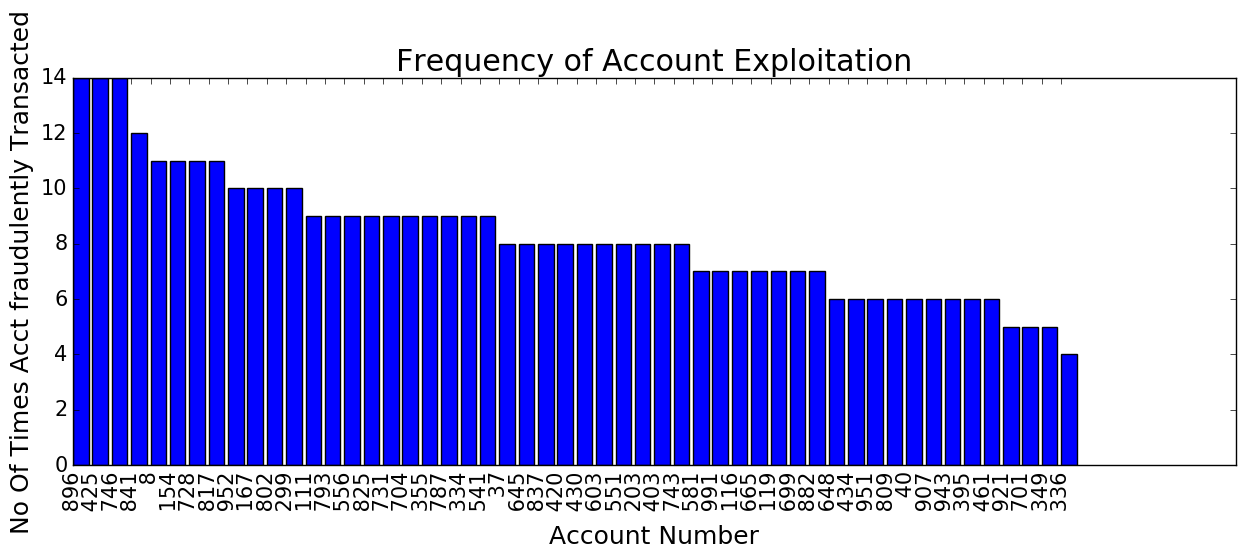

In [16]:
y_pos = np.arange(len(hist))
plot5_start = datetime.now()
plt.figure(figsize=(15,5))
plt.bar(y_pos,hist['NoOfTimes_AcctTransacted'])
plt.xticks(y_pos,hist['Exploited_Acct'],rotation=90)
plt.ylabel('No Of Times Acct fraudulently Transacted')
plt.xlabel('Account Number')
plt.title('Frequency of Account Exploitation')
plot5 = datetime.now() - plot5_start

### SOLUTION RELIABILITY
    1) All accounts harvested on harvest dates (15,16 Jan) were exploited on exploited dates (21,22,23 Jan)
    2) Frequency histogram for transactions of non-virtually exploited accounts, i.e. exclusion of virtually exploited accounts on exploitation dates, did not exhibit any further interesting patterns

### SOLUTION VALIDATION
    1) Checked for any other harvest dates with the compromised merchant
    2) Checked for high frequency of transactions for exploitation dates
    3) Checked for high frequency of transactions for exploited accounts

# Testing

There are [96] opportunistically frauded accounts
(Merchant,Account): (18, 610), Date: [3]
(Merchant,Account): (18, 781), Date: [15]
No. of accounts harvested on [15, 16] and not exploited on [22, 21, 23] is: 0


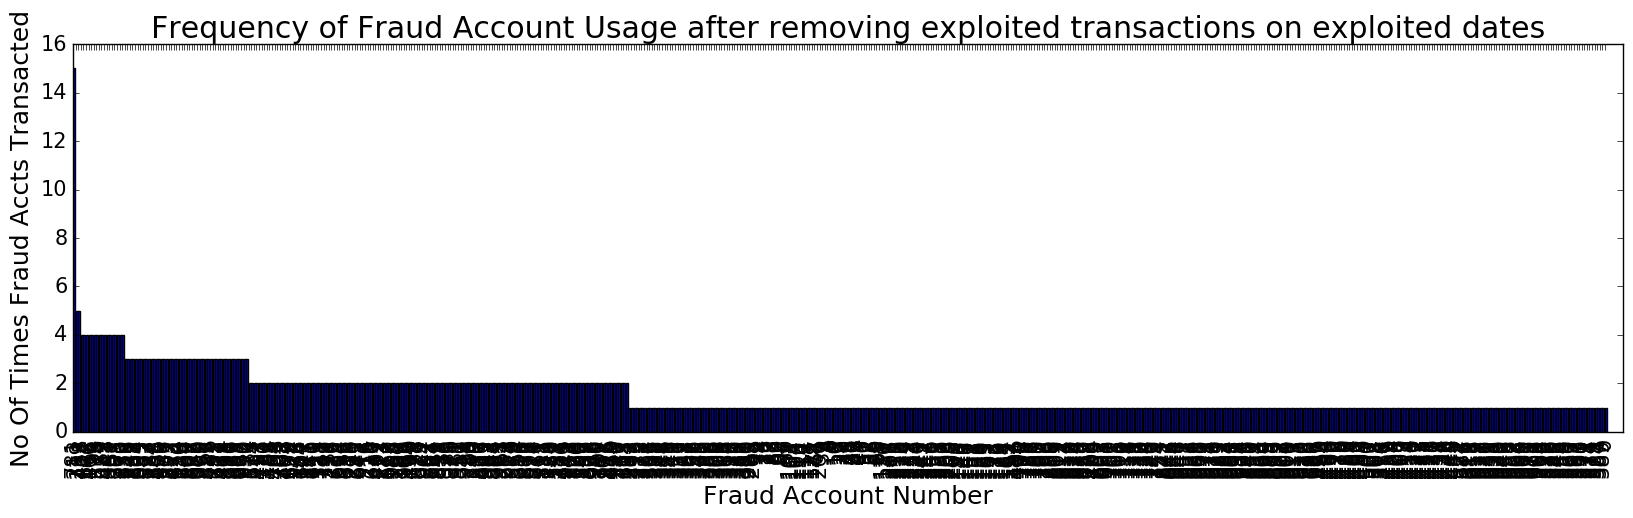

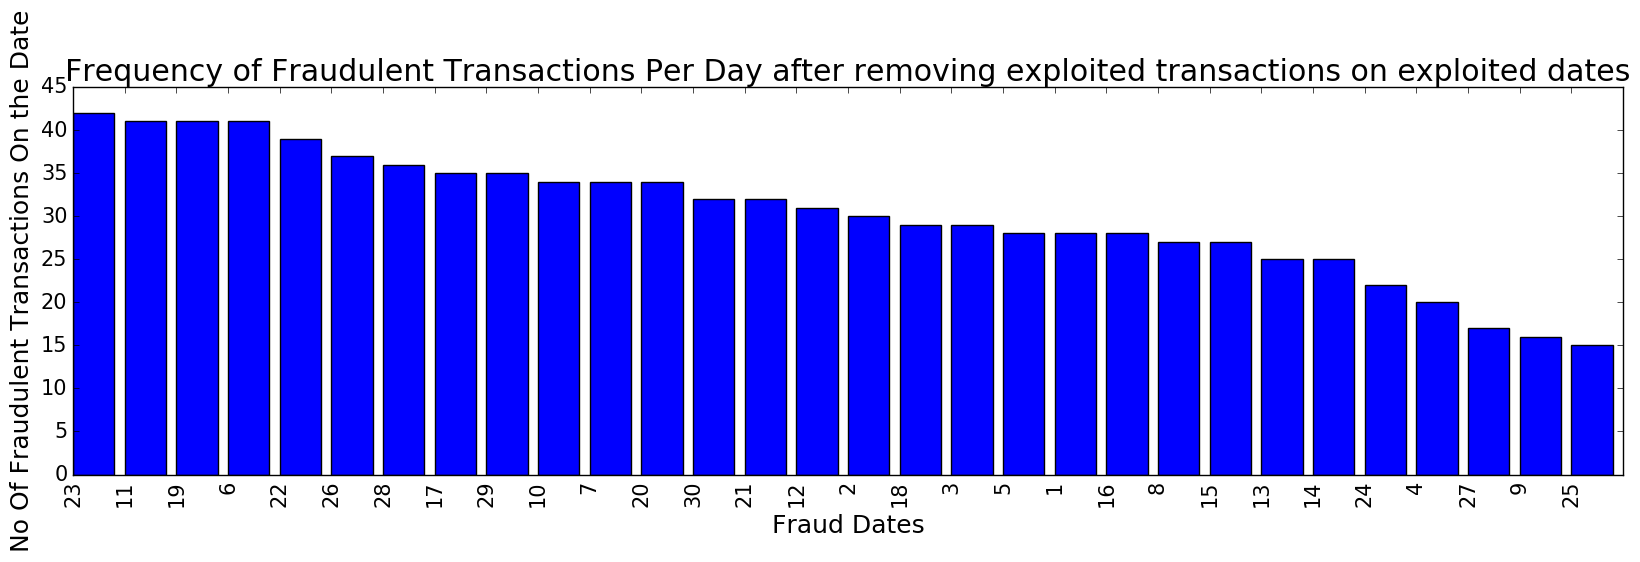

In [17]:
# [Test 1]:
#Checking for any other harvest dates with 'Compromised Merchant'
acctsUnaccounted = list(set(exploitedAccts) - set(finalAccts))
print('There are ['+ str(len(acctsUnaccounted)) + '] opportunistically frauded accounts')
for i,each in enumerate(acctsUnaccounted):
    key = (finalMerchant,each)
    if(key in comboMerchantAcct_ByPotentialHarvestDates):
        value = comboMerchantAcct_ByPotentialHarvestDates.get(key)
        print('(Merchant,Account): '+str(key)+', Date: '+str(value))

# [Test 2]:
#Checking for the accounts that were harvested but not exploited
acctsTxndWithComprMchtOnHvstDates = []
for each in finalHarvestDate:
    md = (finalMerchant,each)
    #valueAcct = MerchantDateCombo_Dict.get(md)
    acctsTxndWithComprMchtOnHvstDates.extend(MerchantDateCombo_Dict.get(md))
acctsTxndWithComprMchtOnHvstDates = list(map(int,set(acctsTxndWithComprMchtOnHvstDates)))
acctMismatch = len(finalAccts) - len(set(finalAccts) & set(acctsTxndWithComprMchtOnHvstDates))
print('No. of accounts harvested on ' + str(finalHarvestDate) + ' and not exploited on ' + 
      str(finalExploitedDate) + ' is: ' + str(acctMismatch))   

# [Test 3]:
#Checking if each of the exploitation dates is a real exploitation date based on a threshold value 
#(So far all the exploitation dates were considered in one go)
harvestExploitMatchForAcctsByExploitationDate = {}
for each in finalExploitedDate:
    temp = exploitedAcctsByExploitationDate[exploitedAcctsByExploitationDate['date']==each]['Account'].unique()
    tempMismatch = len(finalAccts) - len(set(finalAccts) & set(temp))
    harvestExploitMatchForAcctsByExploitationDate.update({str(each): tempMismatch})
if(max(harvestExploitMatchForAcctsByExploitationDate.values()) > MismatchBtwHarvestExploitationAccts_Threshold):
    print("Revisit exploitation dates")

# [Test 4]:
#Frequency of exploitations per account for each of the exploited dates
temp = exploitedAcctsByExploitationDate[exploitedAcctsByExploitationDate['Account'].isin(finalAccts)]
freqOfAcct = {}
for i,each in enumerate(list(temp['date'].unique())):
    t = temp[temp['date']==each][['Merchant','Account']]
    t = list([len(list(group)) for key, group in groupby(t['Account'])])
    freqOfAcct[str(each)] = t

del i, each,key,value,temp,tempMismatch,t

# [Test 5]:
#Re-checking fraud pattern for accounts after removing exploited transactions on exploited dates
non_ExploitedAcctsOnExploitedDate = fraudTxns.loc[~(fraudTxns['date'].isin(finalExploitedDate) & 
                                                    fraudTxns['account'].isin(finalAccts))]
hist = pd.DataFrame(non_ExploitedAcctsOnExploitedDate['account'].value_counts())
hist['Fraud_Accts'] = list(hist.index.values)
hist.rename(columns={'account':'NoOf_Fraud_TxnsInAcct'},inplace=True)
y_pos = np.arange(len(hist))
plot6_start = datetime.now()
plt.figure(figsize=(20,5))
plt.bar(y_pos,hist['NoOf_Fraud_TxnsInAcct'])
plt.xticks(y_pos,hist['Fraud_Accts'],rotation=90)
plt.ylabel('No Of Times Fraud Accts Transacted')
plt.xlabel('Fraud Account Number')
plt.title('Frequency of Fraud Account Usage after removing exploited transactions on exploited dates')
plot6 = datetime.now() - plot6_start

# [Test 6]:
#Re-checking fraud pattern per day after removing exploited transactions on exploited dates
hist = pd.DataFrame(non_ExploitedAcctsOnExploitedDate['date'].value_counts())
hist['Fraud_TxnDate'] = list(hist.index.values)
hist.rename(columns={'date':'NoOf_Fraud_TxnsOnDate'},inplace=True)
y_pos = np.arange(len(hist))
plot7_start = datetime.now()
plt.figure(figsize=(20,5))
plt.bar(y_pos,hist['NoOf_Fraud_TxnsOnDate'])
plt.xticks(y_pos,hist['Fraud_TxnDate'],rotation=90)
plt.ylabel('No Of Fraudulent Transactions On the Date')
plt.xlabel('Fraud Dates')
plt.title('Frequency of Fraudulent Transactions Per Day after removing exploited transactions on exploited dates')
plot7 = datetime.now() - plot7_start

## Note
    1) High frequency threshold formula
    2) Warnings in execution are ignored

In [18]:
highFreqTxn_Threshold = int(round(MerchantDateCombo['NoOfAccountsTransacted'].mean() + 
                                  1*MerchantDateCombo['NoOfAccountsTransacted'].std(),0))
#Changing this threshold retrieves more harvest days. This is restricted to 2 standard deviations so that the
#transaction count is abnormally high i.e. >95% of the values. It may be noted that the results were the same
#for 1SD and 2SDs.Accounts
print('Threshold value is: ' + str(highFreqTxn_Threshold))
#Incremental count of unique accounts exploited (helps in fixing threshold)
acctList = []
acctCount = []
for i in range(1,harvestDateCutOff) :
    key = (finalMerchant,i)
    if key in MerchantDateCombo_Dict:
        acctList.extend(list(map(int,MerchantDateCombo_Dict.get(key))))
        uniqueAcctList = set(acctList)
        uniqueAccts = str(len(set(uniqueAcctList)))
        acctCount.append(uniqueAccts)

Threshold value is: 7


# Result

In [19]:
print('Harvesting was done at Merchant: [' + str(finalMerchant) + '] on days: ' + str(finalHarvestDate) + '.')
print('A total of : [' + str(finalNoOfAcctsHarvested) + '] accounts exploited on days: ' + 
      str(finalExploitedDate) + ' were obtained non-opportunistically.')

Harvesting was done at Merchant: [18] on days: [15, 16].
A total of : [52] accounts exploited on days: [22, 21, 23] were obtained non-opportunistically.


### SOLUTION REFINEMENT
    1) Merchant-wise scan through all [Merchant - Date] combinations for additional harvest dates by incrementally considering unique fraud accounts. Further to validate that these are not opportunistic fraud, all transacted accounts in these harvested days should be tested for match with the exploited accounts.
    2) Analysis outcome can be improved if more details like transaction time, transaction success, transaction amount etc. are available.
    3) Elimination of warnings in execution
    4) Function programming
    5) Graph analysis

###### Execution timer

In [20]:
print('Overall execution took [', datetime.now() - startTime, '] seconds.')
execTime = datetime.now() - startTime - (plot1 + plot2 + plot3 + plot4 + plot5 + plot6 + plot7)
print('Execution took [', execTime, '] seconds upon excluding generation of plots.')
del startTime, plot1, plot2, plot3, plot4, plot5, plot6, plot7, execTime

Overall execution took [ 0:00:24.666725 ] seconds.
Execution took [ 0:00:19.146784 ] seconds upon excluding generation of plots.
